In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Airbnb_data.csv')


In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [6]:
df.duplicated().sum()  # no duplicates are available in the data set .

0

In [7]:
df.info() #checking the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

insights:

there are 48895 entries in data frame

16 columns with data type of each column

10 numeric and 6 object columns

not_null count for each column is there,(few null values are present in 4 columns)

In [9]:
df.isna().sum()  # checking for he null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

here we can clearly see the missing values with counts in the respective column.

we will compute the percentage missing values just to understand how much data is missing.

In [12]:
round(df.isnull().sum()/len(df)*100,2).astype(str) +'  %'

id                                  0.0  %
name                               0.03  %
host_id                             0.0  %
host_name                          0.04  %
neighbourhood_group                 0.0  %
neighbourhood                       0.0  %
latitude                            0.0  %
longitude                           0.0  %
room_type                           0.0  %
price                               0.0  %
minimum_nights                      0.0  %
number_of_reviews                   0.0  %
last_review                       20.56  %
reviews_per_month                 20.56  %
calculated_host_listings_count      0.0  %
availability_365                    0.0  %
dtype: object

since we cannot impute the name and host_name so we can list them as unknown so it is better to impute those as unknown rather than  dropping them.

In [14]:
df['name']=df['name'].fillna('unknown')

In [15]:
df['host_name']=df['host_name'].fillna('no_name')

In [16]:
df['name'].isna().sum()  # we have successfully imputed the null values in name and host_name columns.

0

In [17]:
df['host_name'].isna().sum()

0

last review column have aprox 10000 missing values (almost 20 % of the data),since this column is not of much importance so we are droping it.

In [19]:
df.drop('last_review',axis=1,inplace=True)

no of reviews also have 10000 null values ,but we are not going to drop it,we will impute those with 0 reviews because it is not going to affect our data set ,but if we drop this column as well we will lose the 80 % of the data from this column.

In [21]:
df['reviews_per_month'].fillna(0,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [23]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

we have dealt with the missing values completely

***EDA and VISUALIZATION***

In [26]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

now we will check the unique value_counts in relevent categorical columns.

In [28]:
pd.DataFrame(df['neighbourhood_group'].value_counts().reset_index())

neighbourhood_group  count
0           Manhattan  21661
1            Brooklyn  20104
2              Queens   5666
3               Bronx   1091
4       Staten Island    373

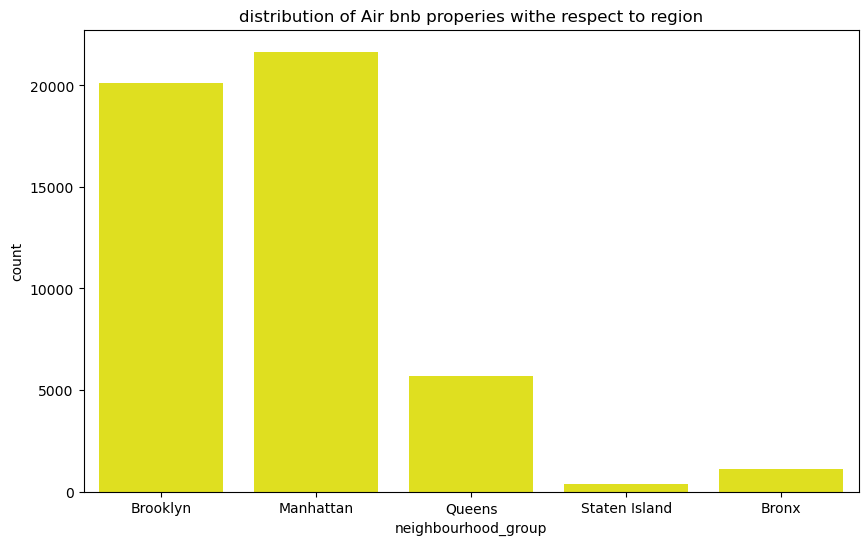

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='neighbourhood_group',color='yellow')
plt.title('distribution of Air bnb properies withe respect to region')
plt.show()

we can clerly see that Brooklyn and manhattan have most no of listings and staten_island and Bronx having least no listings.

In [31]:
pd.DataFrame(df['neighbourhood'].value_counts().reset_index())

neighbourhood  count
0          Williamsburg   3920
1    Bedford-Stuyvesant   3714
2                Harlem   2658
3              Bushwick   2465
4       Upper West Side   1971
..                  ...    ...
216      Fort Wadsworth      1
217        Richmondtown      1
218            New Dorp      1
219           Rossville      1
220         Willowbrook      1

[221 rows x 2 columns]

In [32]:
pd.DataFrame(df['neighbourhood'].value_counts().reset_index())['count'].median() 

32.0

In [33]:
pd.DataFrame(df['neighbourhood'].value_counts().reset_index())['count'].mean()

221.2443438914027

In [34]:
pd.DataFrame(df['neighbourhood'].value_counts().reset_index())['count'].describe() 

count     221.000000
mean      221.244344
std       536.160961
min         1.000000
25%        10.000000
50%        32.000000
75%       154.000000
max      3920.000000
Name: count, dtype: float64

we can see from the above report that distriburion is too much positively skewed (there is too much difference in mean and median).

visualizing the 221 different places in one graph is nearly impossible so, we will breakdown our data on the basis of no of listings,

type_1= have more than 300 listings

type_2= have more than 50 listings and less than 300

type_3= the remaings less than 50

it is very unclear that which neighbourhood have how much listings. we will distribute these listings , we will see only those neighbourhoods which have more than 100 listings.

In [38]:
df_neighbourhood=pd.DataFrame(df['neighbourhood'].value_counts().reset_index())

In [39]:
df_neighbourhood_1=df_neighbourhood[df_neighbourhood['count']>300]


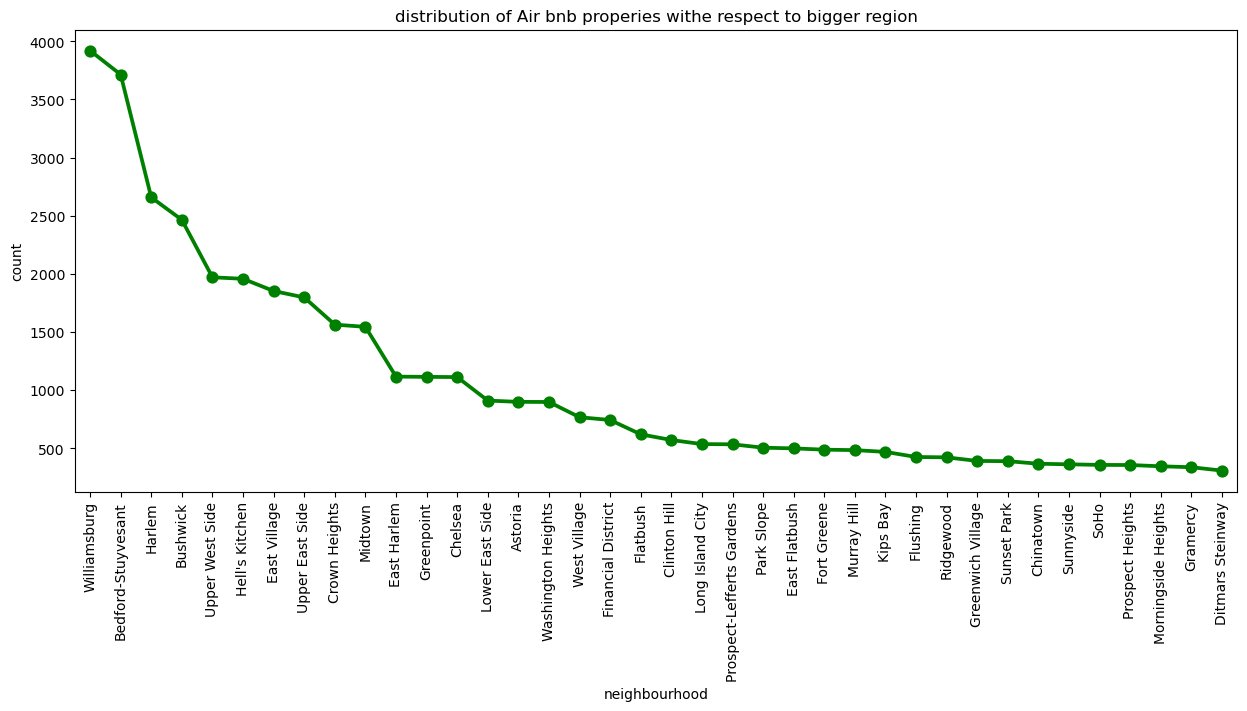

In [40]:
plt.figure(figsize=(15,6))
sns.pointplot(data=df_neighbourhood_1,x='neighbourhood',y='count',color='green')
plt.title('distribution of Air bnb properies withe respect to bigger region')
plt.xticks(rotation=90)
plt.show()

from this point plot we can clearly see that Williamsburg, Bedford-Stuyvesant have most no of listings of Air bnb properties, we can conclude that there is a high demand of Air bnb properies.

In [42]:
df_neighbourhood_2=df_neighbourhood[(df_neighbourhood['count']<=300)&(df_neighbourhood['count']>50) ]

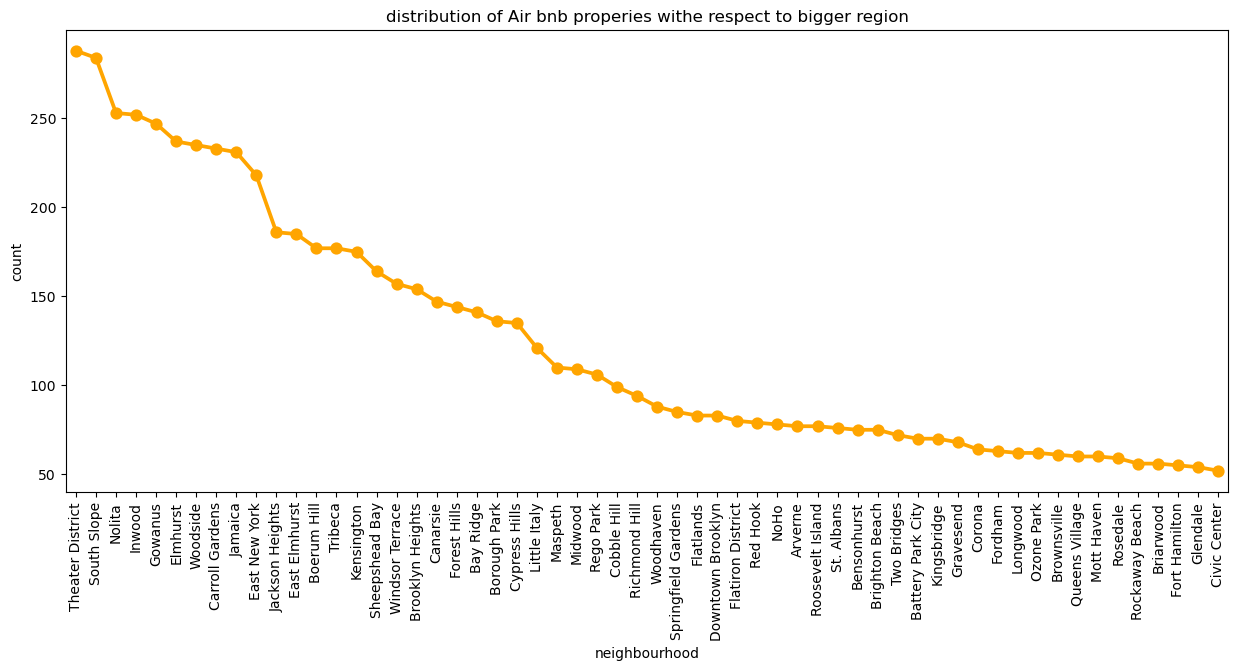

In [43]:
plt.figure(figsize=(15,6))
sns.pointplot(data=df_neighbourhood_2,x='neighbourhood',y='count',color='orange')
plt.title('distribution of Air bnb properies withe respect to bigger region')
plt.xticks(rotation=90)
plt.show()

In [44]:
df_neighbourhood_3=df_neighbourhood[df_neighbourhood['count']<=50]


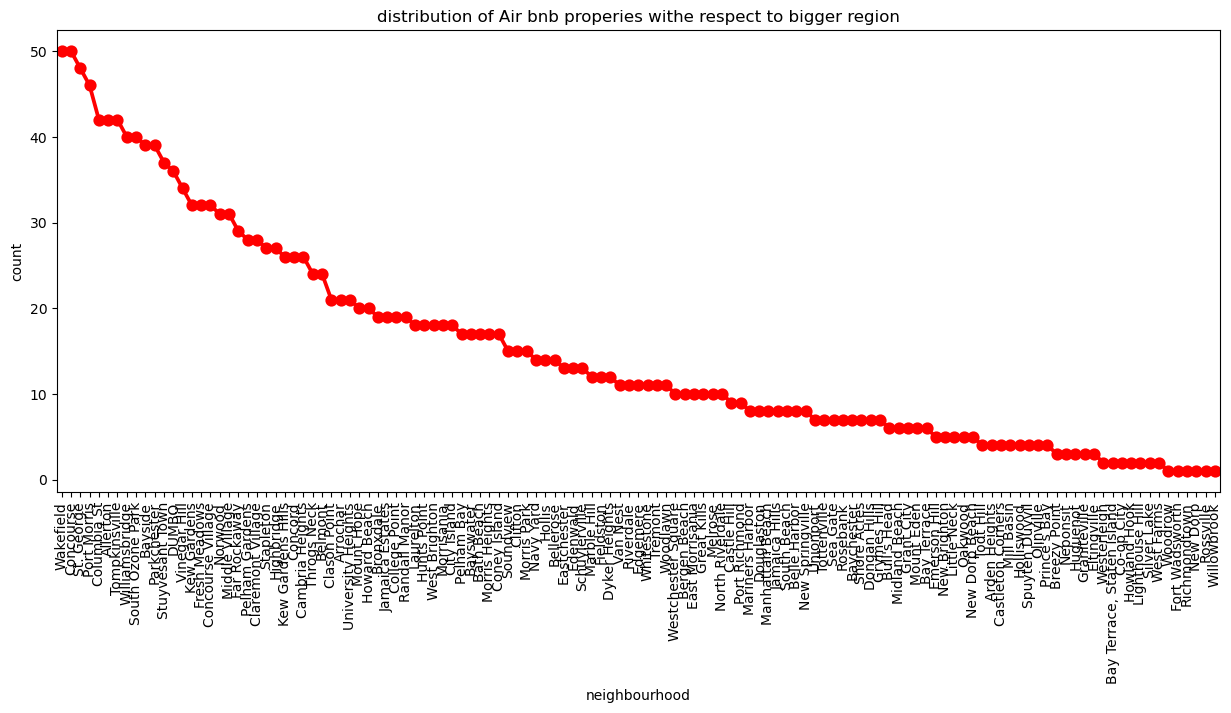

In [45]:
plt.figure(figsize=(15,6))
sns.pointplot(data=df_neighbourhood_3,x='neighbourhood',y='count',color='red')
plt.title('distribution of Air bnb properies withe respect to bigger region')
plt.xticks(rotation=90)
plt.show()

based on previous three point plots we can have an idea about the no of listings in different neighbourhoods

In [47]:
df_roomtype=pd.DataFrame(df['room_type'].value_counts().reset_index())

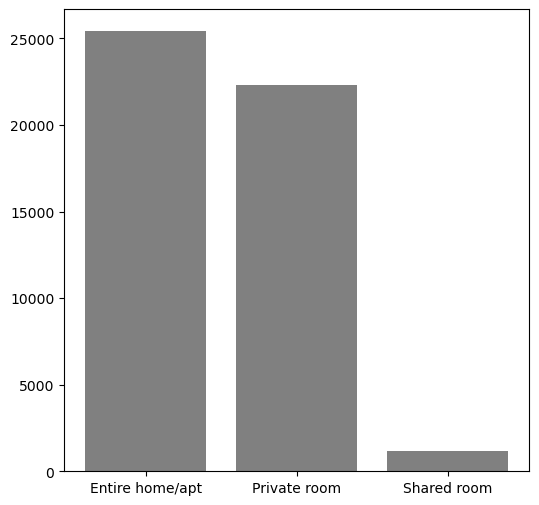

In [48]:
plt.figure(figsize=(6,6))
plt.bar(df_roomtype['room_type'],df_roomtype['count'],color='gray')
plt.show()

we can see here easily that entire home and private room type of properties are numerous and shared room is very less in no's.

now lets check about the price of the air bnb properties.

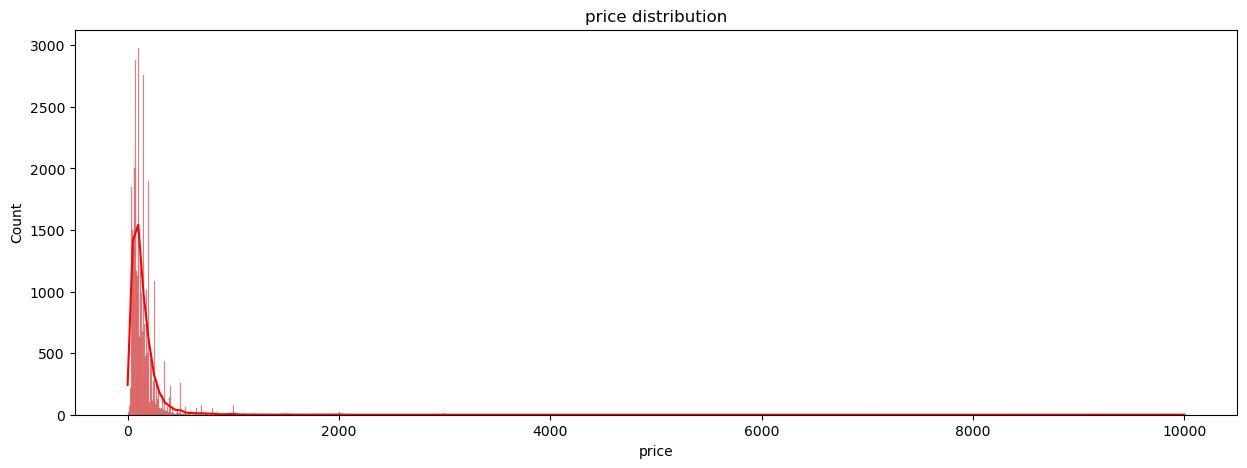

In [51]:
plt.figure(figsize=(15,5))
sns.histplot(df['price'],kde=True,color='red')
plt.title('price distribution')
plt.show()

we can clearly see that data is too much positively skewed, there are so many outliers are there, so it is better to make another section as luxury properties ,where there is no constraint of price.

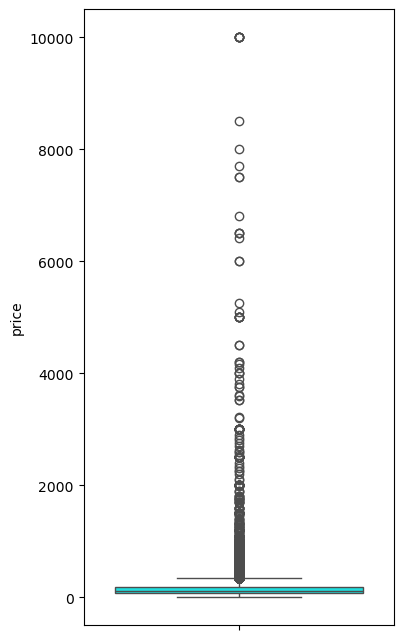

In [53]:
plt.figure(figsize=(4,8))
sns.boxplot(df['price'],color='cyan')
plt.show()

In [54]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [55]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [56]:
df['minimum_nights'].value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: count, Length: 109, dtype: int64

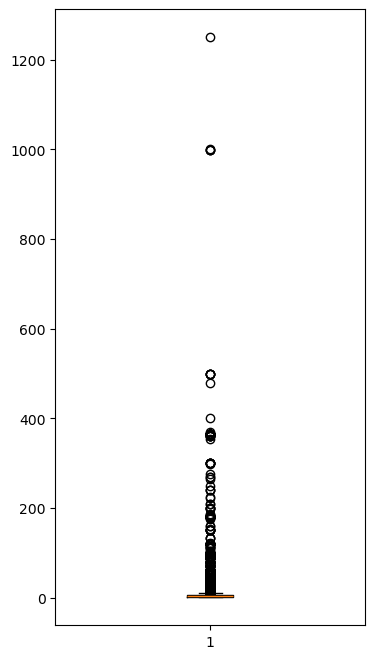

In [57]:
plt.figure(figsize=(4,8))
plt.boxplot(df['minimum_nights'])
plt.show()

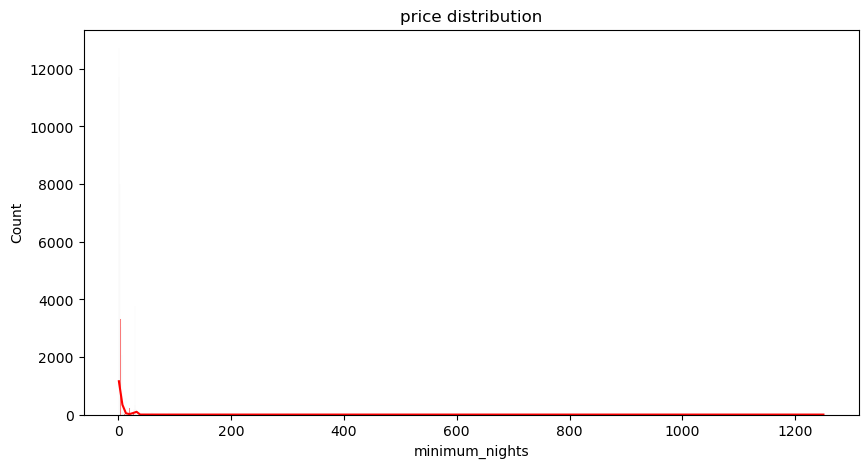

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(df['minimum_nights'],kde=True,color='red')
plt.title('price distribution')
plt.show()

minimun nights also contain outliers , lets treat these outliers

In [60]:
def iqr_tech(data_column):
    q1=np.percentile(data_column,25)
    q3=np.percentile(data_column,75)
    iqr=q3-q1
    up_bound=q3+iqr
    low_bound=q1-iqr
    return low_bound,up_bound

we have made a function to get the upper limit and lower limit.

In [62]:
iqr_tech(df['price'])

(-37.0, 281.0)

here we are getting our upper limit and lower limit of price of the listed properties. now we will segrigate our data frame into two different data frames, normal properties and luxurous properties.

In [64]:
iqr_tech(df['minimum_nights'])

(-3.0, 9.0)

In [65]:
df_normal_properties=df[(df['price']<281)&(df['minimum_nights']<=9)]
df_normal_properties

id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
5          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                                ...        ...   
48889  36484363                                 QUIT PRIVATE HOUSE  107716952   
48890  36484665    Charming one bedroom - newly renovated rowhouse    8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg    6570630   
48893  36485609               43rd St. Time Square-cozy single bed   30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen   68119814   

         host_name neighbourhood_group       neighbourhood  latitude  \
0             John            Brooklyn          Kensington  40.64749   
1         Jennifer           Manhattan             Midtown  40.75362   
2        Elisabeth           Manhattan              Harlem  40.80902   
3      LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
5            Chris           Manhattan         Murray Hill  40.74767   
...            ...                 ...                 ...       ...   
48889      Michael              Queens             Jamaica  40.69137   
48890      Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891      Marisol            Brooklyn            Bushwick  40.70184   
48893          Taz           Manhattan      Hell's Kitchen  40.75751   
48894   Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
5      -73.97500  Entire home/apt    200               3                 74   
...          ...              ...    ...             ...                ...   
48889  -73.80844     Private room     65               1                  0   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
2                   0.00                               1               365  
3                   4.64                               1               194  
5                   0.59                               1               129  
...                  ...                             ...               ...  
48889               0.00                               2               163  
48890               0.00                               2                 9  
48891               0.00                               2                36  
48893               0.00                               6                 2  
48894               0.00                               1                23  

[38058 rows x 15 columns]

In [66]:
df_luxurious_properties=df[df['price']>=281]
df_luxurious_properties

id                                               name    host_id  \
20         7801                   Sweet and Spacious Brooklyn Loft      21207   
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
82        19169                   Entire 2 Bedroom - Large & Sunny      73128   
85        19601                perfect for a family or small group      74303   
103       23686  2000 SF 3br 2bath West Village private  townhouse      93790   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 stops from Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt in the Best Location of FiDi   29741813   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   
48842  36453160  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...  224171371   
48856  36457700  Large 3 bed, 2 bath , garden , bbq , all you need   66993395   

                     host_name neighbourhood_group       neighbourhood  \
20                       Chaya            Brooklyn        Williamsburg   
61                       Petra           Manhattan             Chelsea   
82                      JoLynn           Manhattan     Lower East Side   
85                      Maggie            Brooklyn    Brooklyn Heights   
103                        Ann           Manhattan        West Village   
...                        ...                 ...                 ...   
48758                LaGabrell              Queens    Long Island City   
48833                      Yue           Manhattan  Financial District   
48839                  Richard            Brooklyn      Sheepshead Bay   
48842  LuxuryApartmentsByAmber           Manhattan             Chelsea   
48856                   Thomas            Brooklyn  Bedford-Stuyvesant   

       latitude  longitude        room_type  price  minimum_nights  \
20     40.71842  -73.95718  Entire home/apt    299               3   
61     40.74623  -73.99530  Entire home/apt    375             180   
82     40.71851  -73.98892  Entire home/apt    285               5   
85     40.69723  -73.99268  Entire home/apt    800               1   
103    40.73096  -74.00319  Entire home/apt    500               4   
...         ...        ...              ...    ...             ...   
48758  40.75508  -73.93258  Entire home/apt    350               2   
48833  40.70605  -74.01042  Entire home/apt    475               2   
48839  40.59866  -73.95661     Private room    800               1   
48842  40.75204  -74.00292  Entire home/apt    350               1   
48856  40.68886  -73.92879  Entire home/apt    345               4   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
20                     9               0.07                               1   
61                     5               0.12                               1   
82                    70               0.62                               1   
85                    25               0.24                               1   
103                   46               0.55                               2   
...                  ...                ...                             ...   
48758                  0               0.00                               1   
48833                  0               0.00                               1   
48839                  0               0.00                               1   
48842                  0               0.00                               1   
48856                  0               0.00                               3   

       availability_365  
20                    0  
61                  180  
82                  328  
85                    7  
103                 243  
...                 ...  
48758               364  
48833                64  
48839                23  
48842                 9  
48856               354  

[4424 rows x 15 columns]

from above we can clearly see that there are almost 4500 properies which can be treated as luxurious properties.

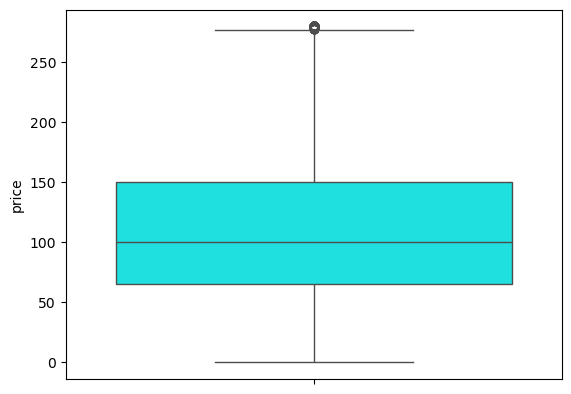

In [68]:
sns.boxplot(df_normal_properties['price'],color='aqua')
plt.show()

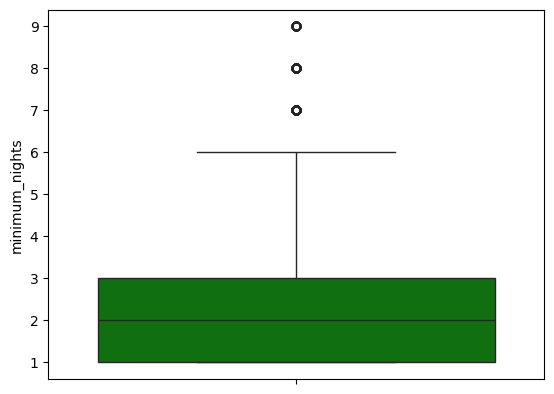

In [69]:
sns.boxplot(df_normal_properties['minimum_nights'],color='green')
plt.show()

now we will perform EDA part as we have treated with outliers

1. we will check the price distribution of bookings of Air bnb using histogram. 

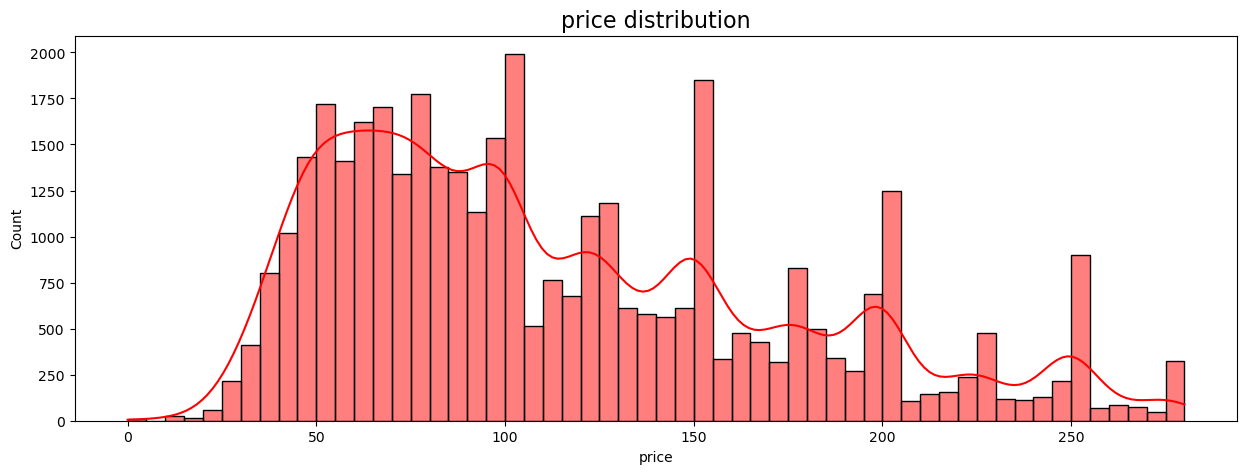

In [72]:
plt.figure(figsize=(15,5))
sns.histplot(df_normal_properties['price'],kde=True,color='red')
plt.title('price distribution',fontsize=16)
plt.show()

2. we will check the no of counts of listings according to neighbouring_groups using count plot..

In [74]:
pd.DataFrame(df_normal_properties['neighbourhood_group'].value_counts().reset_index())

neighbourhood_group  count
0            Brooklyn  16799
1           Manhattan  14991
2              Queens   4939
3               Bronx    995
4       Staten Island    334

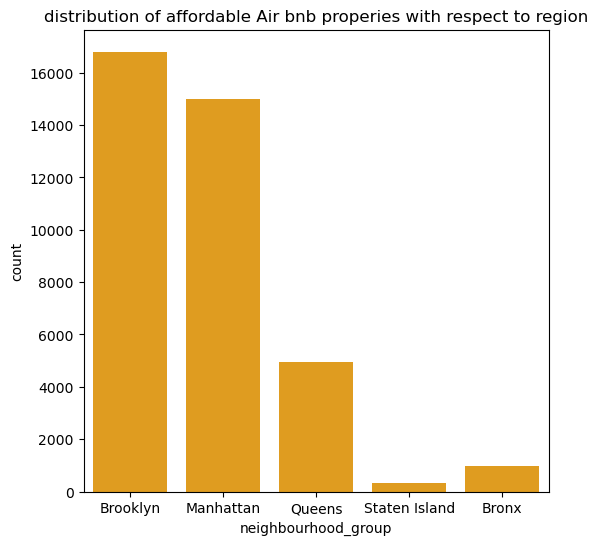

In [75]:
plt.figure(figsize=(6,6))
sns.countplot(data=df_normal_properties,x='neighbourhood_group',color='orange')
plt.title('distribution of affordable Air bnb properies with respect to region')
plt.show()

lets check if thera any luxurious property is present in staten island or bronx or queens.

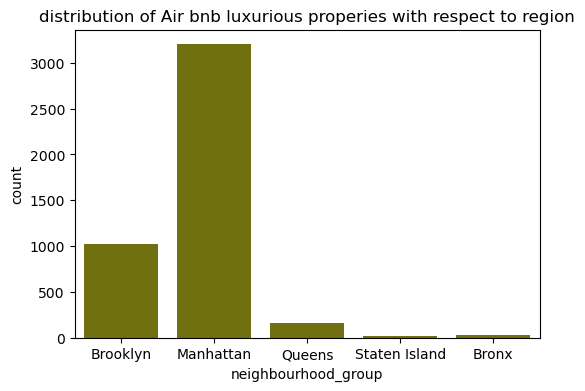

In [77]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_luxurious_properties,x='neighbourhood_group',color='olive')
plt.title('distribution of Air bnb luxurious properies with respect to region')
plt.show()

we can conclude that , most of the luxurious properties are present in manhattan and few in brooklyn also, but there are very less costly properties are listed in staten island and Bronx

now we will check the avg price of properties according to the neighbourhood groups

In [80]:
df_normal_properties.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             75.450251
Brooklyn         103.679683
Manhattan        135.478020
Queens            88.807653
Staten Island     85.556886
Name: price, dtype: float64

In [81]:
df_grouped=pd.DataFrame(df_normal_properties.groupby('neighbourhood_group')['price'].mean().reset_index())
df_grouped

neighbourhood_group       price
0               Bronx   75.450251
1            Brooklyn  103.679683
2           Manhattan  135.478020
3              Queens   88.807653
4       Staten Island   85.556886

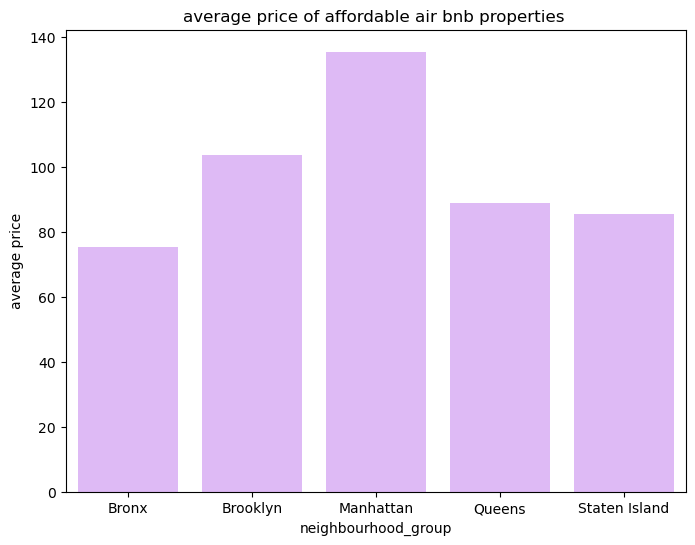

In [82]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_grouped['neighbourhood_group'],y=df_grouped['price'],color='#E0B0FF')
plt.ylabel('average price')
plt.title('average price of affordable air bnb properties ')
plt.show()

In [83]:
df_grouped_luxurious=pd.DataFrame(df_luxurious_properties.groupby('neighbourhood_group')['price'].mean().reset_index())
df_grouped_luxurious

neighbourhood_group       price
0               Bronx  493.787879
1            Brooklyn  538.343811
2           Manhattan  541.726194
3              Queens  553.348387
4       Staten Island  822.666667

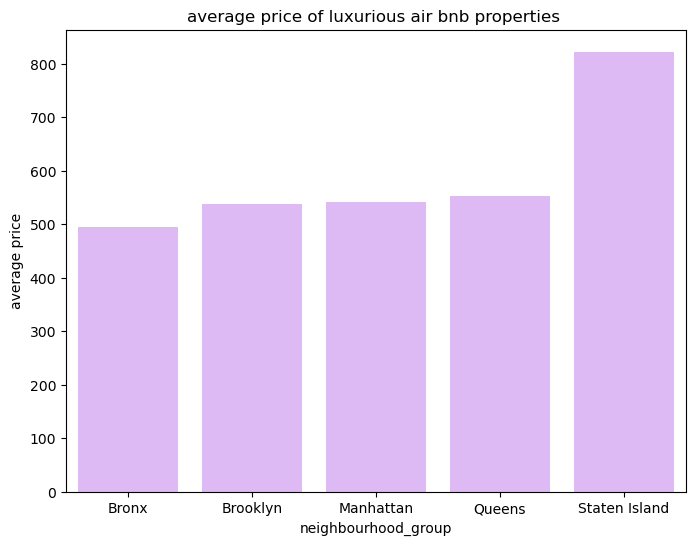

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(x=df_grouped_luxurious['neighbourhood_group'],y=df_grouped_luxurious['price'],color='#E0B0FF')
plt.ylabel('average price')
plt.title('average price of luxurious air bnb properties ')
plt.show()

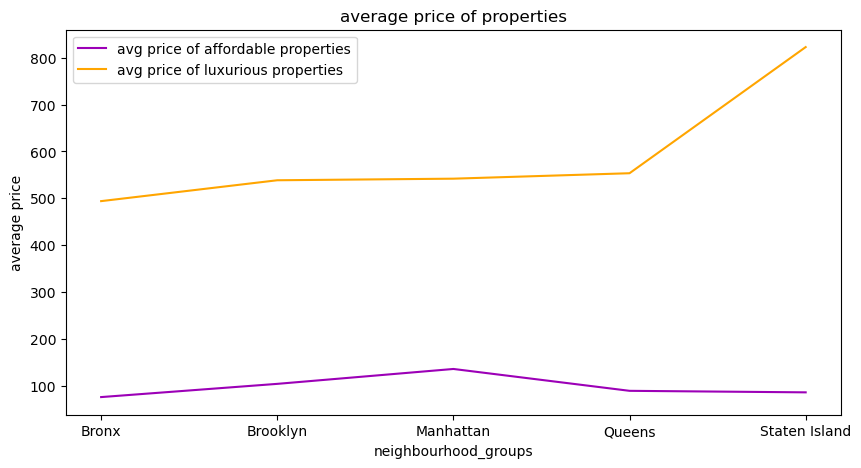

In [85]:
plt.figure(figsize=(10,5))
plt.plot(df_normal_properties.groupby('neighbourhood_group')['price'].mean(),color='#9C00B7')
plt.plot(df_luxurious_properties.groupby('neighbourhood_group')['price'].mean(),color='orange')
plt.xlabel('neighbourhood_groups')
plt.ylabel('average price')
plt.title('average price of properties')
plt.legend(['avg price of affordable properties','avg price of luxurious properties'],loc='best')
plt.show()

lets compare the average price in normal properties and luxurious properties.

here is a special insight we can draw , there are very less no of properties are present in staten island but some of them might be very luxurious. Lets find out about it

In [88]:
df_luxurious_properties[df_luxurious_properties['neighbourhood_group']=='Staten Island']

id                                               name    host_id  \
1424     639199    Beautiful 4BR/4BA Home, Staten Island, NY City.    1483081   
1621     738588        Wedding guests accommodations, 3-7 bedrooms    1360198   
3049    1798271                      Spacious center hall colonial    9430973   
6333    4623622        Victorian with Stunning Views of NYC Harbor   22506665   
10722   8253376                 large house with inground pool/spa   43524236   
11373   8842185                         Staten Island NYC Marathon   46305818   
13682  10253159  Newly renovated house 4 bedroom. Minutes from NYC   10721093   
22353  18051877                            Victorian Film location    2675644   
22365  18066733            5br Duplex. @ Ferry!  Water&City Views!  117492425   
25386  20305160    Beach House Retreat. 15 minutes from Manhattan.    1715301   
41443  32239170   FairPlay BNB for alternative life style renters!  241924064   
42636  33097219                   Brand new home in Staten island!  249104360   
45572  34835762  Central Hall Colonial with Free Parking Bus EX...  252051657   
45606  34858865       Private home next to beach,transport,parking   32162495   
48533  36310353  Staten Island Resort minutes from ferry! Amazi...   28586423   

        host_name neighbourhood_group      neighbourhood  latitude  longitude  \
1424       Marina       Staten Island        Tottenville  40.50868  -74.23986   
1621       Marina       Staten Island           Arrochar  40.59193  -74.06476   
3049        Donna       Staten Island            Woodrow  40.53884  -74.19826   
6333      William       Staten Island         St. George  40.64571  -74.07835   
10722       Miran       Staten Island          Todt Hill  40.60926  -74.10092   
11373   Elizabeth       Staten Island        Shore Acres  40.60597  -74.06208   
13682    Jonathan       Staten Island  Castleton Corners  40.61042  -74.12277   
22353      Alissa       Staten Island      Randall Manor  40.63952  -74.09730   
22365        Dine       Staten Island         St. George  40.64605  -74.07897   
25386        Mark       Staten Island     Fort Wadsworth  40.59546  -74.06092   
41443       Alice       Staten Island        Shore Acres  40.60525  -74.06745   
42636      Arkady       Staten Island        Grymes Hill  40.61572  -74.08901   
45572  Anastasios       Staten Island       Prince's Bay  40.53076  -74.20295   
45606     Mostafa       Staten Island        Eltingville  40.53939  -74.15389   
48533    Danielle       Staten Island          Stapleton  40.62878  -74.07301   

             room_type  price  minimum_nights  number_of_reviews  \
1424   Entire home/apt    299               3                 59   
1621   Entire home/apt    625               4                  1   
3049   Entire home/apt    700               7                  0   
6333   Entire home/apt   1000               1                  0   
10722  Entire home/apt    429               2                  4   
11373     Private room    300               1                  0   
13682  Entire home/apt    299               3                 49   
22353  Entire home/apt   5000               1                  0   
22365  Entire home/apt    289               4                  2   
25386  Entire home/apt    800               7                  0   
41443  Entire home/apt    300               1                  0   
42636  Entire home/apt    300               5                  1   
45572  Entire home/apt   1250              14                  0   
45606  Entire home/apt    299              10                  0   
48533  Entire home/apt    450               5                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
1424                0.82                               1               245  
1621                0.02                               4               335  
3049                0.00                               1                 0  
6333                0.

In [89]:
df_luxurious_properties[df_luxurious_properties['neighbourhood_group']=='Staten Island']['price'].describe()

count      15.000000
mean      822.666667
std      1193.424943
min       289.000000
25%       299.500000
50%       429.000000
75%       750.000000
max      5000.000000
Name: price, dtype: float64

In [90]:
df[df['neighbourhood_group']=='Staten Island'].shape

(373, 15)

there are total 373 listings of air bnb in staten island from which 15 lie under luxurious properties.

In [95]:
top_ten_neighbourhood=df_normal_properties['neighbourhood'].value_counts().nlargest(10)
top_ten_neighbourhood

neighbourhood
Williamsburg          3188
Bedford-Stuyvesant    3176
Harlem                2229
Bushwick              2117
East Village          1426
Crown Heights         1340
Hell's Kitchen        1314
Upper West Side       1288
Upper East Side       1215
East Harlem            954
Name: count, dtype: int64

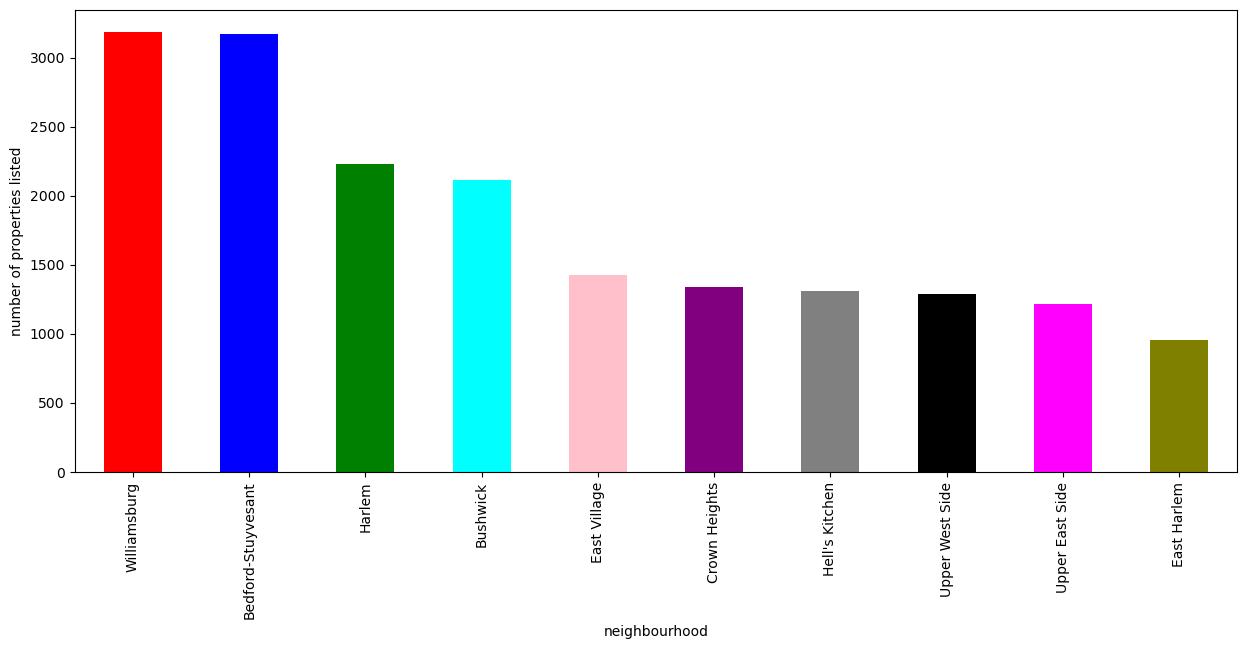

In [103]:
top_ten_neighbourhood.plot(kind='bar',figsize=(15,6),color=['red','blue','green','cyan','pink','purple','grey','black','magenta','olive'])
plt.ylabel('number of properties listed')
plt.show()

now checking the top 10 host names based on number of listings

In [106]:
top_ten_host=df_normal_properties['host_name'].value_counts().nlargest(10)
top_ten_host

host_name
Michael    318
David      309
John       227
Sarah      200
Alex       195
Daniel     183
Maria      174
Jessica    165
Andrew     151
Anna       148
Name: count, dtype: int64

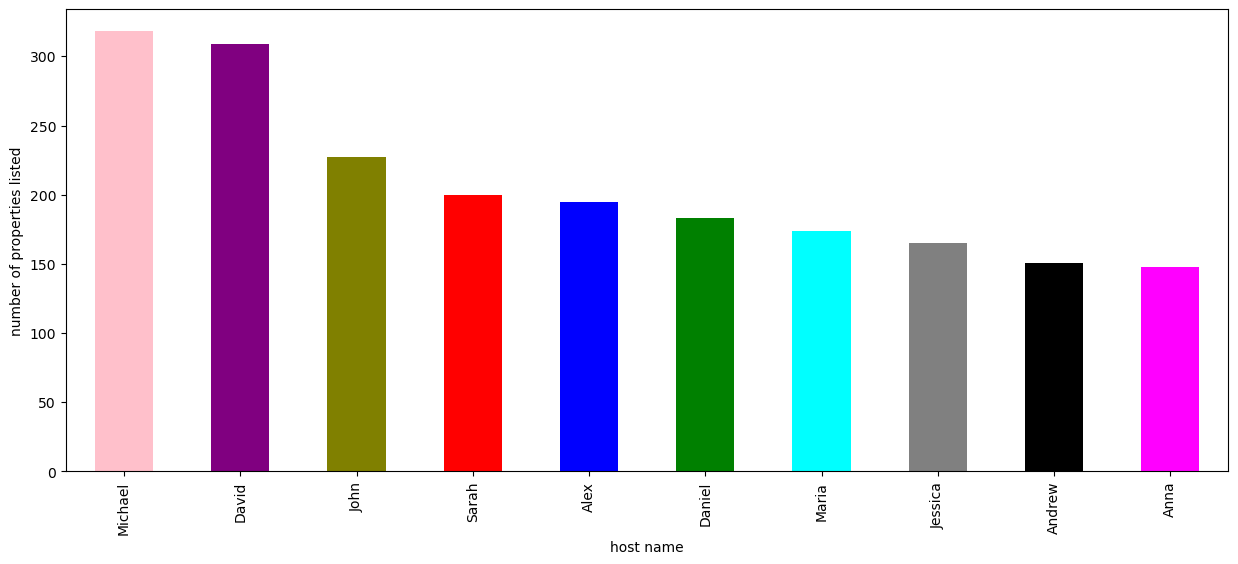

In [110]:
top_ten_host.plot(kind='bar',figsize=(15,6),color=['pink','purple','olive','red','blue','green','cyan','grey','black','magenta'])
plt.ylabel('number of properties listed')
plt.xlabel('host name')
plt.show()

lets check the listings on the basis of room type.

In [113]:
room_type=pd.DataFrame(df_normal_properties['room_type'].value_counts().reset_index())
room_type

room_type  count
0     Private room  19525
1  Entire home/apt  17565
2      Shared room    968

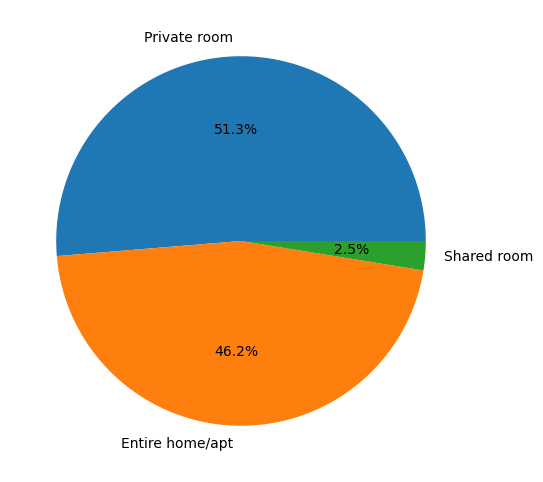

In [115]:
sizes=room_type['count']
plt.figure(figsize=(10,6))
plt.pie(sizes,labels=room_type['room_type'],autopct='%1.1f%%')
plt.show()

we can clearly see that shared room have least no of count

lets check about the no of reviews with respect to the neighbourhood groups

In [121]:
reviews=df_normal_properties.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
reviews

neighbourhood_group  number_of_reviews
0               Bronx              27667
1            Brooklyn             445449
2           Manhattan             385368
3              Queens             149815
4       Staten Island              11212

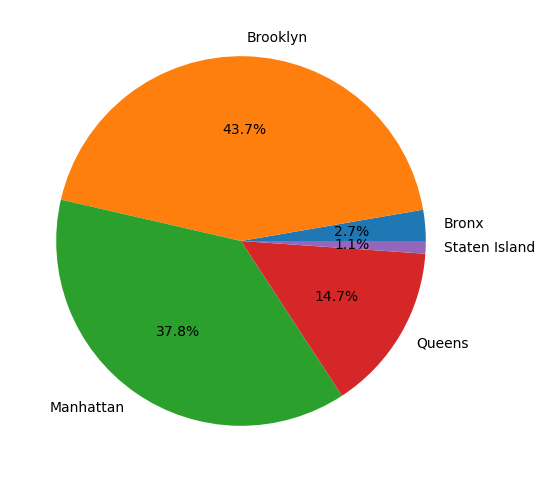

In [123]:
plt.figure(figsize=(10,6))
plt.pie(reviews['number_of_reviews'],labels=reviews['neighbourhood_group'],autopct='%1.1f%%')
plt.show()

from aboove pie chart we can interpret that most no of reviews are available on properties at brooklyn ,than mahattan ,than queens and least no of reviews are given on the properties present at staten island

<Figure size 1200x1200 with 0 Axes>

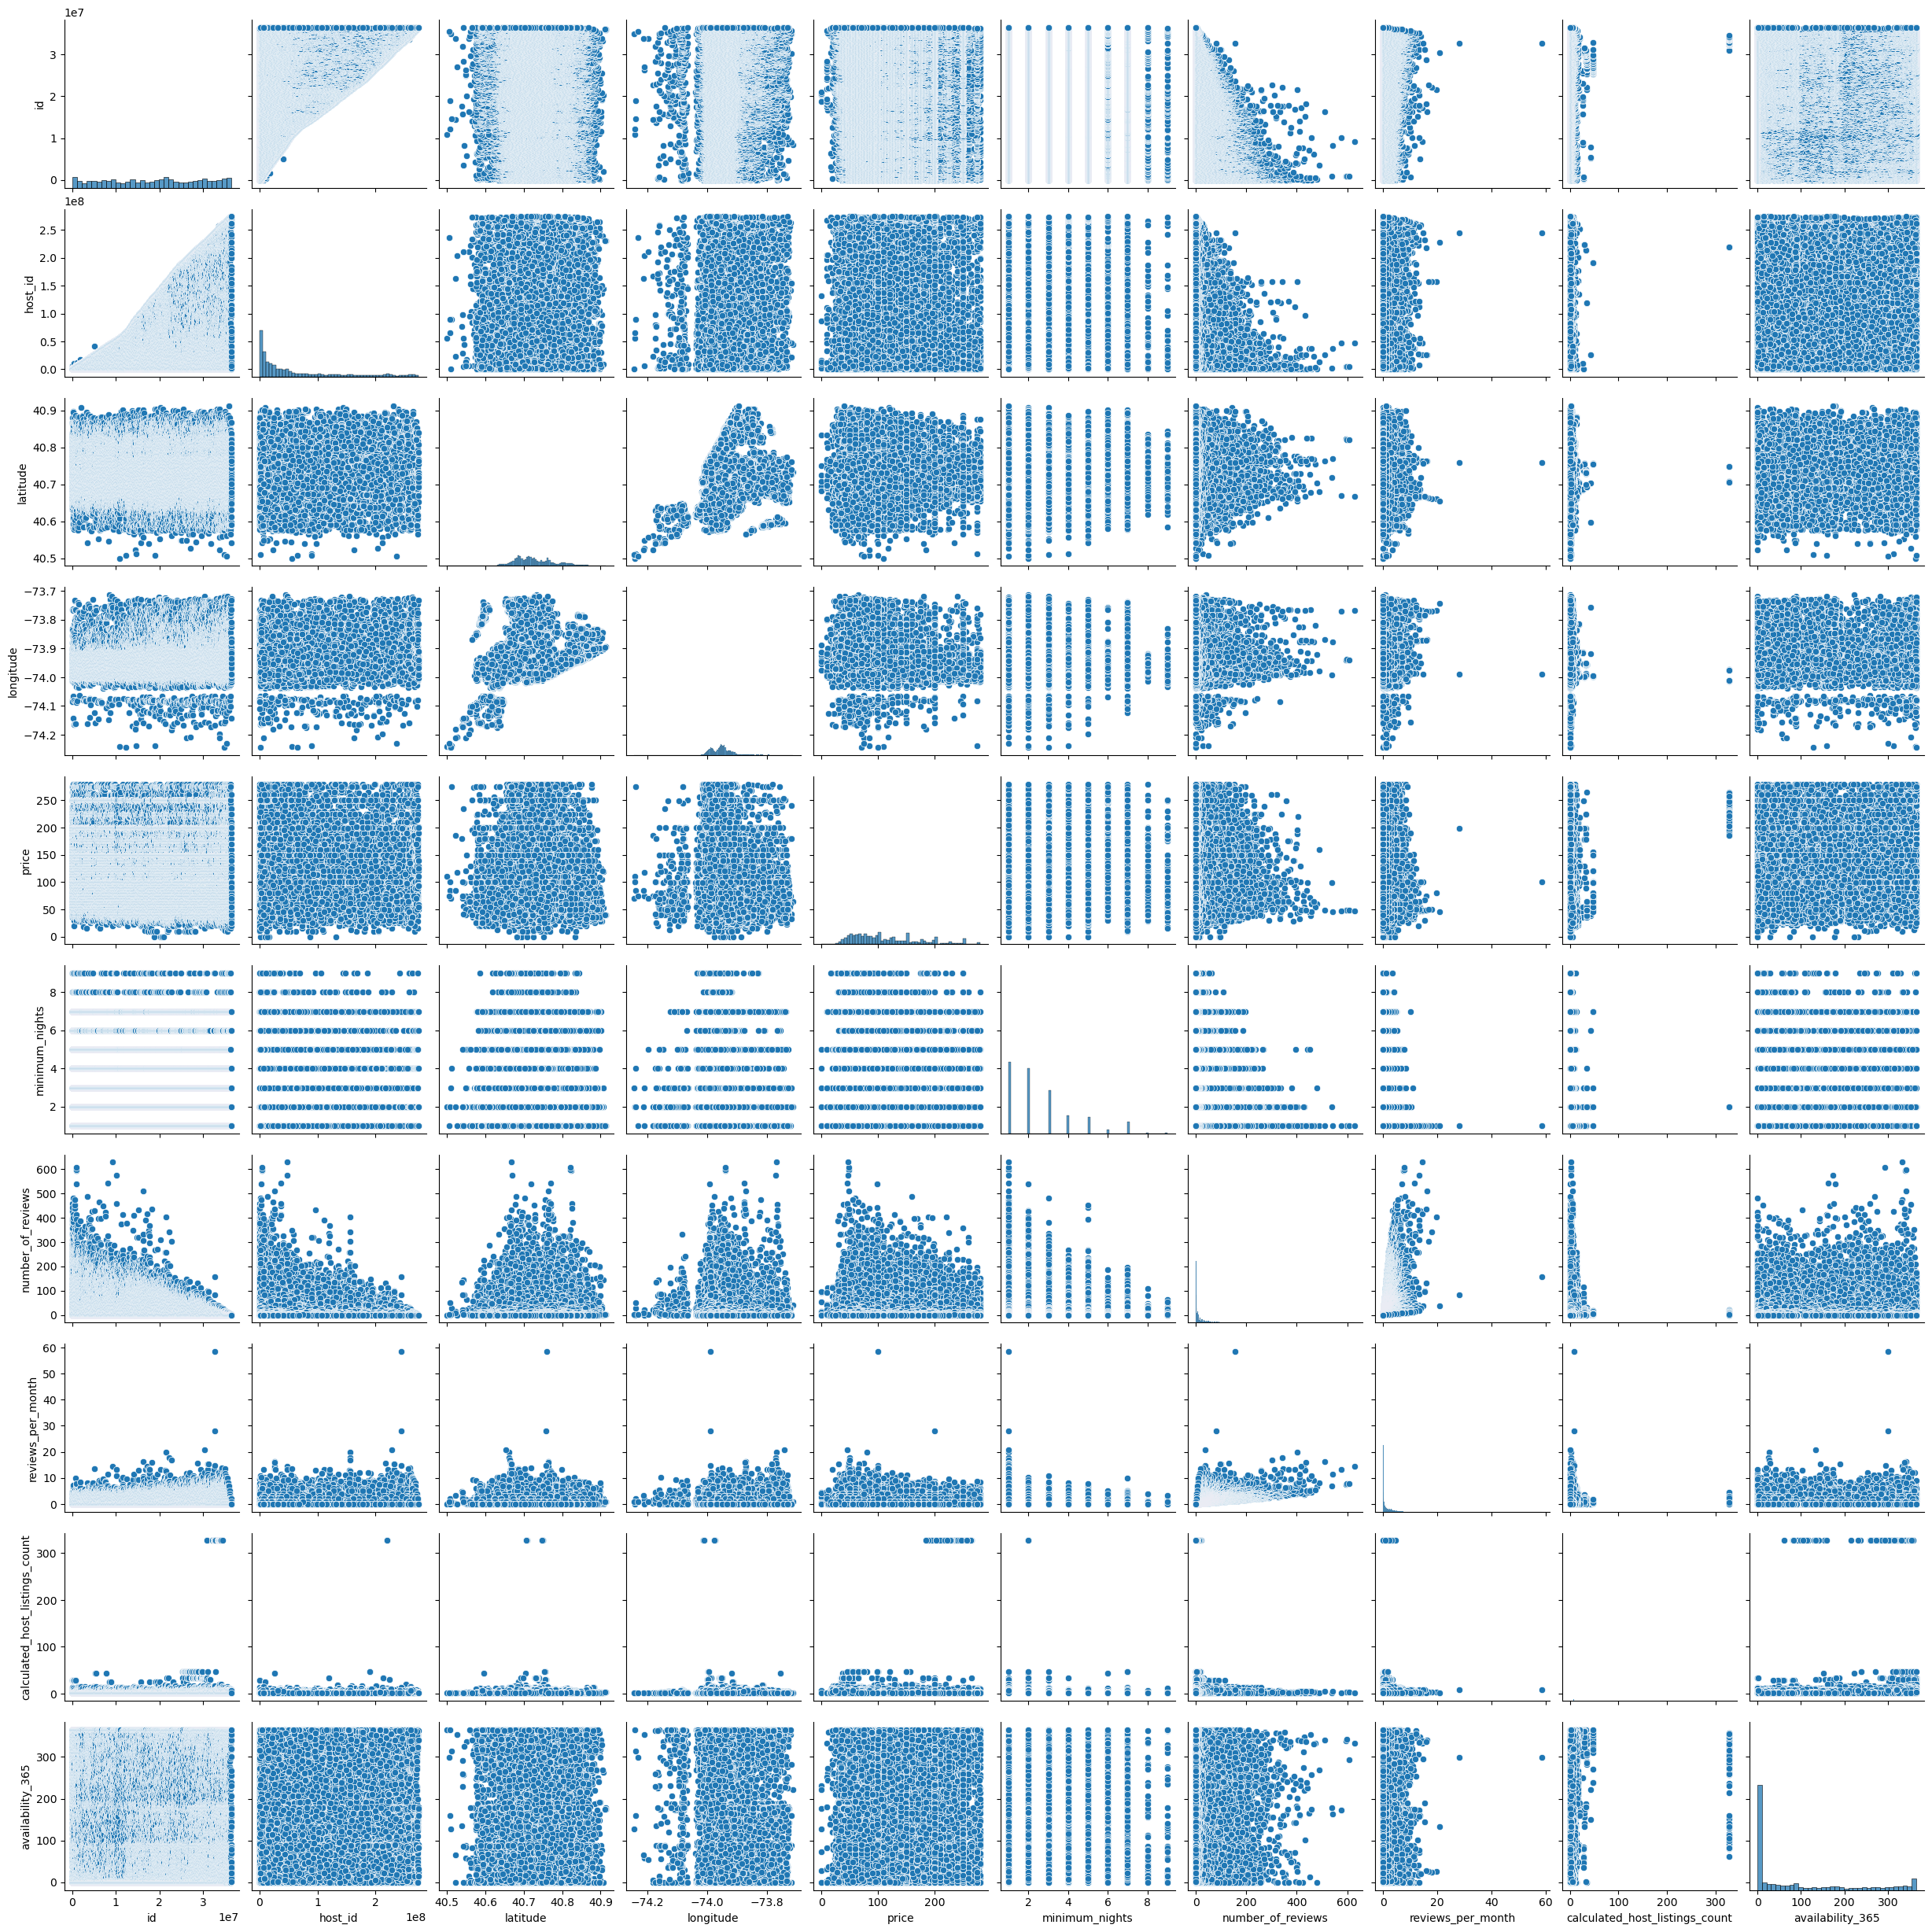

In [132]:
plt.figure(figsize=(12,12))
sns.pairplot(df_normal_properties)
plt.show()

since we have 10 numerical features in our dataset it took every possible pair of features and plot the graph between those two features.  

so we use pair plot, and there are 100 graphs we can see on our screen to have beter understatnding of the feature correlation, we can also get some idea of correleation by ploting heatmap also.

In [136]:
df_normal_properties.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [140]:
df_normal_properties_numeric=df_normal_properties[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]

we created another data frame with relevant numerical columns so that we can see proper heat map

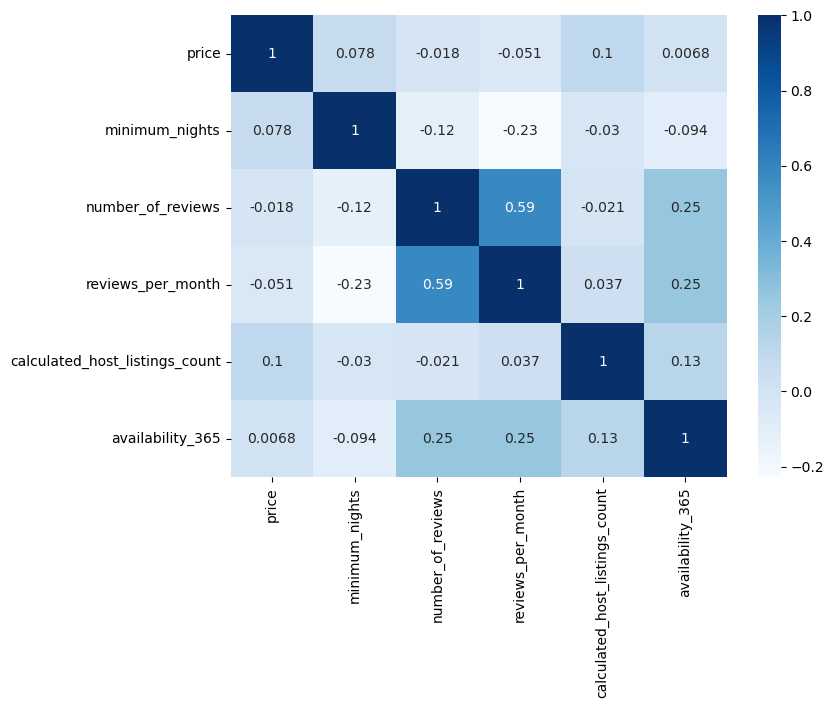

In [165]:
plt.figure(figsize=(8,6))
sns.heatmap(df_normal_properties_numeric.corr(),annot=True,cmap='Blues')
plt.show()

****thank you****